In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import food_data
import os

In [2]:
MODEL_NAME = 'simple_v1'
MODEL_NAME_JSON = MODEL_NAME + '.json'

In [3]:
hist_df = pd.read_json('./histories/' + MODEL_NAME_JSON)

In [4]:
hist_df

,loss,accuracy,val_loss,val_accuracy
0,4.202750,0.049548,15.753965,0.000198
1,3.719144,0.124637,22.503176,0.001321
2,2.838825,0.288205,27.842520,0.001057
3,1.414007,0.620542,46.380116,0.000991
4,0.413780,0.888935,63.239277,0.000991


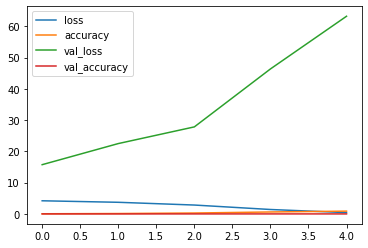

In [5]:
plt.plot(hist_df)
plt.legend(hist_df)

In [6]:
model = tf.keras.models.load_model('./models/' + MODEL_NAME)

In [7]:
def get_id(name):
    names = name.split("/")
    return names[1]

In [8]:
def get_label(path):
    names = path.split("/")
    return names[0]

In [9]:
def exact_path(path):
    return "../food-101/images/" + path + ".jpg"

In [10]:
LABELS = os.listdir("../food-101/images")
test_names = []

with open("../food-101/meta/test.txt") as f:
    test_names = f.readlines()
    print(test_names.__len__())


test_df = pd.DataFrame(map(lambda x: x[:-1], test_names), columns=['path'])
test_df['label'] = test_df['path'].map(lambda x: get_label(x))
test_df['id'] = test_df['path'].map(lambda x: get_id(x))
test_df['exact_path'] = test_df['path'].map(lambda x: exact_path(x))
test_df.head(10)

25250


,path,label,id,exact_path
0,apple_pie/1011328,apple_pie,1011328,../food-101/images/apple_pie/1011328.jpg
1,apple_pie/101251,apple_pie,101251,../food-101/images/apple_pie/101251.jpg
2,apple_pie/1034399,apple_pie,1034399,../food-101/images/apple_pie/1034399.jpg
3,apple_pie/103801,apple_pie,103801,../food-101/images/apple_pie/103801.jpg
4,apple_pie/1038694,apple_pie,1038694,../food-101/images/apple_pie/1038694.jpg
5,apple_pie/1047447,apple_pie,1047447,../food-101/images/apple_pie/1047447.jpg
6,apple_pie/1068632,apple_pie,1068632,../food-101/images/apple_pie/1068632.jpg
7,apple_pie/110043,apple_pie,110043,../food-101/images/apple_pie/110043.jpg
8,apple_pie/1106961,apple_pie,1106961,../food-101/images/apple_pie/1106961.jpg
9,apple_pie/1113017,apple_pie,1113017,../food-101/images/apple_pie/1113017.jpg


In [11]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255)

In [12]:
test_gen = test_generator.flow_from_dataframe(dataframe = test_df, directory=None, x_col='exact_path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb',
    classes=LABELS, class_mode='categorical', batch_size=32, shuffle=True)

Found 25250 validated image filenames belonging to 101 classes.


In [13]:
result = model.evaluate(test_gen, batch_size=32)

790/790 [==============================] - 96s 117ms/step - loss: 18.5109 - accuracy: 0.0826


In [14]:
preds = model.predict(test_gen)

790/790 [==============================] - 80s 101ms/step


In [15]:
preds.shape

(25250, 101)

In [16]:
INDEX = 11200

In [17]:
GUESS_LABEL_INDEX = np.argmax(preds[INDEX])

In [18]:
LABELS[GUESS_LABEL_INDEX]

'poutine'

In [19]:
guess_info = test_df.iloc[INDEX]

'fried_rice'

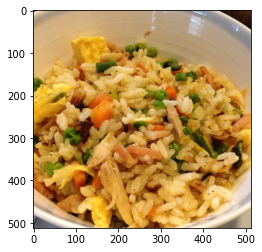

In [20]:
plt.imshow(plt.imread(guess_info['exact_path']))
guess_info['label']

In [21]:
food_search = food_data.search_foods(LABELS[GUESS_LABEL_INDEX].replace('_', ' '))

In [22]:
food_data.get_energy(food_search)